<a href="https://colab.research.google.com/github/tomohiko-urai/minnano_ai/blob/master/07_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像データをヒストグラムで表示する

In [ ]:
!wget https://storage.googleapis.com/iotcolab2023/022845332.jpg -O a.jpg

--2023-02-11 02:02:14--  https://storage.googleapis.com/iotcolab2023/022845332.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 559085 (546K) [image/jpeg]
Saving to: ‘a.jpg’

a.jpg               100%[===================>] 545.98K  --.-KB/s    in 0.04s   

2023-02-11 02:02:14 (14.9 MB/s) - ‘a.jpg’ saved [559085/559085]



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

In [ ]:
def getHistogram(img):
  if len(img.shape) == 3:
    # カラーのとき
    channels = 3
  else:
    # モノクロのとき
    channels = 1

  histogram = []
  for ch in range(channels):
    # チャンネル(B, G, R)ごとのヒストグラム
    hist_ch = cv2.calcHist([img], [ch], None, [256], [0, 256])
    histogram.append(hist_ch[:,0])

  # チャンネルごとのヒストグラムを返す
  return histogram

def drawHistogram(hist):
  # チャンネル数
  ch = len(hist)

  # グラフの表示色
  if (ch == 1):
    colors = ["black"]
    label = ["Gray"]
  else:
    colors = ["blue", "green", "red"]
    label = ["B", "G", "R"]

  # ヒストグラムをmatplotlibで表示
  x = range(256)
  for col in range(ch):
    y = hist[col]
    plt.plot(x, y, color = colors[col], label = label[col])

  # 凡例の表示
  plt.legend(loc = 2)

  plt.show()

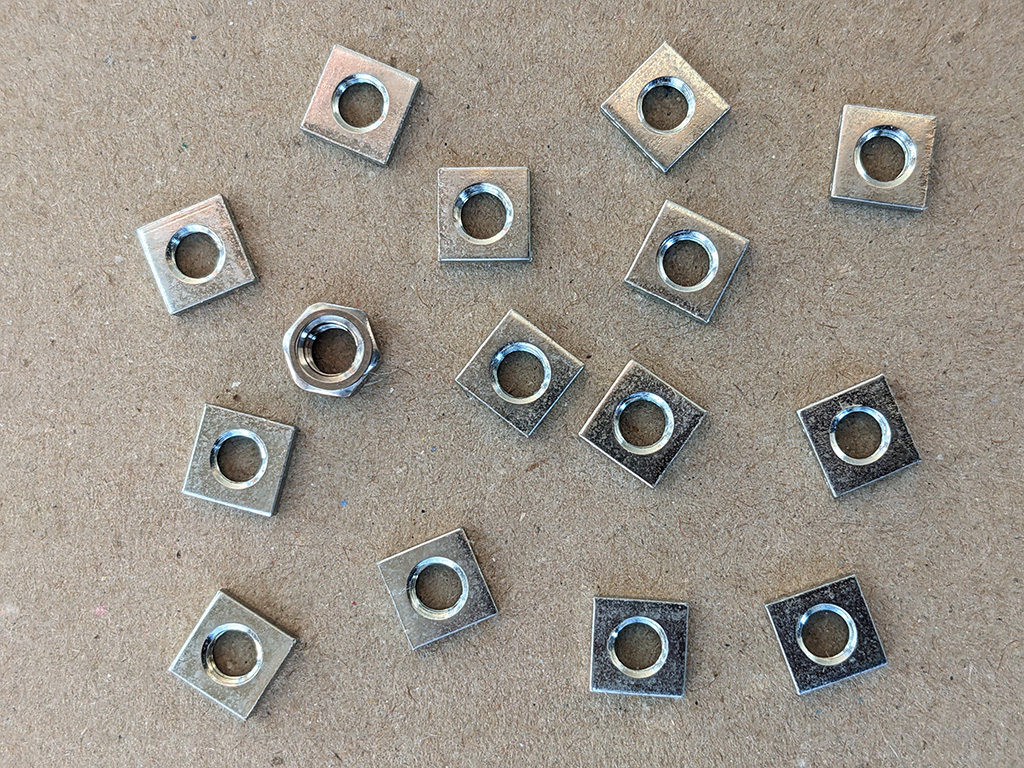

In [ ]:
img = cv2.imread('a.jpg')
cv2_imshow(img)

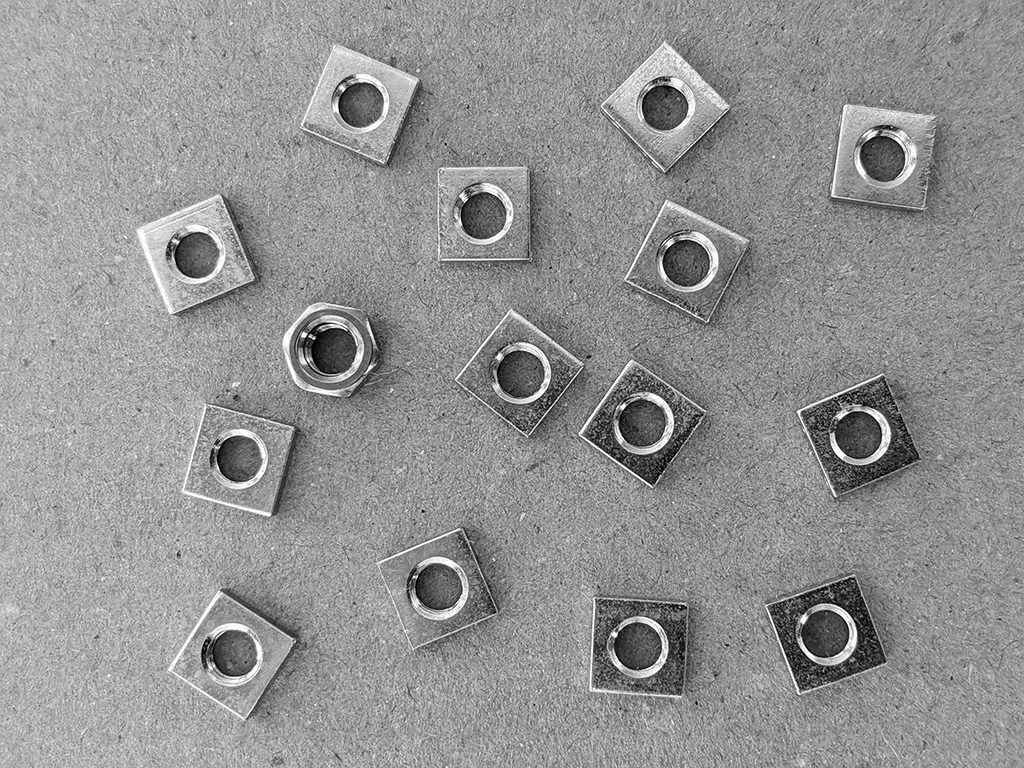

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(img_gray)

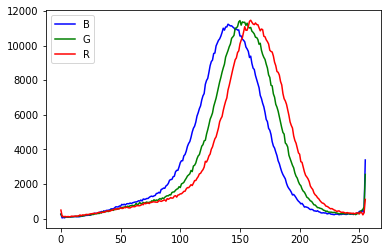

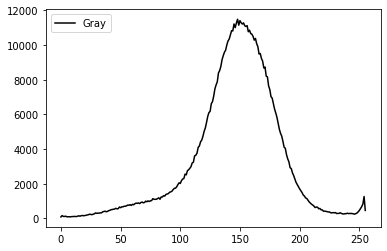

In [ ]:
hist = getHistogram(img)
drawHistogram(hist)
hist = getHistogram(img_gray)
drawHistogram(hist)

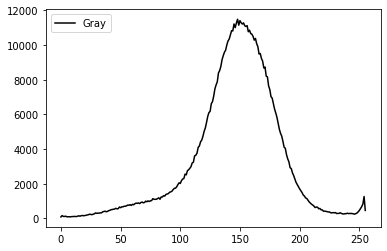

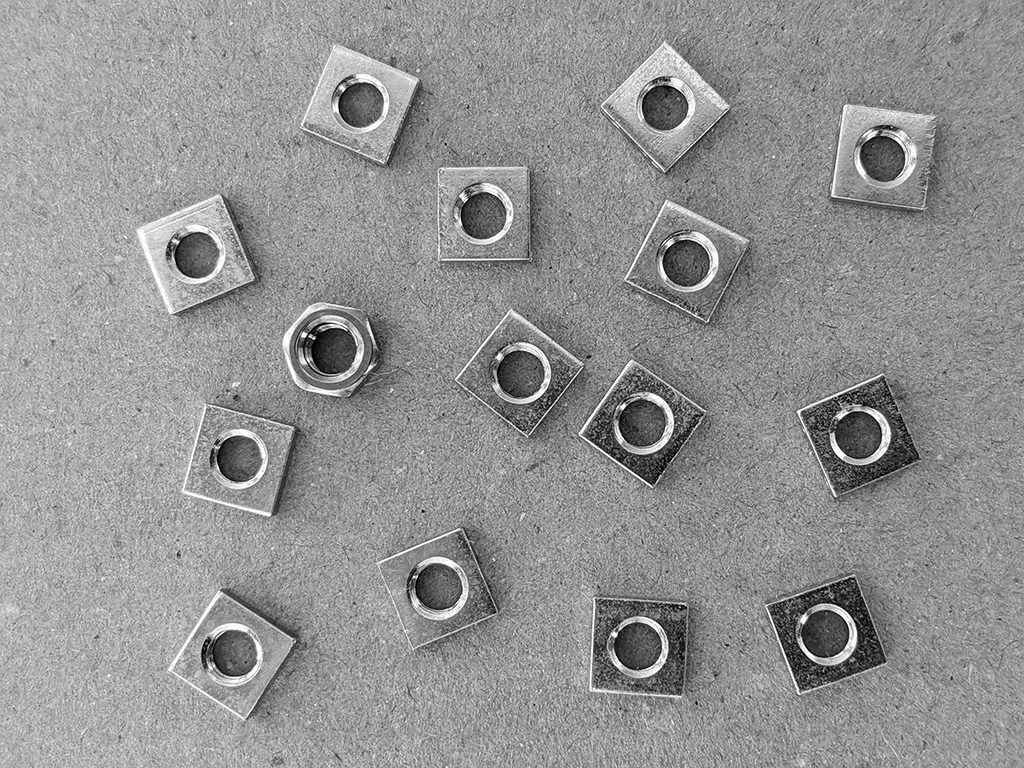

In [ ]:
img_gray_n = img_gray.copy()
cv2.normalize(img_gray, img_gray_n, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX )
hist = getHistogram(img_gray_n)
drawHistogram(hist)
cv2_imshow(img_gray_n)